In [43]:
# This assignment is to implement the perceptron learning algorithm (PLA) on 
# classifying linear- separable data and its variant (e.g., pocket perceptron, PLA_Pocket) 
# on classifying non-linear- separable data.
import cv2
import numpy as  np
import matplotlib.pyplot as plt
# sign function which returns the sign of the input
def sign(a):
    if (a>0):
        return 1
    elif (a<0): 
        return -1
    else:
        return 0

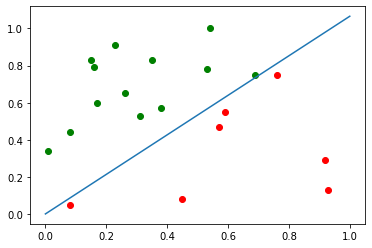

Error rate:  0.0


In [44]:
### Part 1
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_LinearSeparable.txt', delimiter=',')
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_LinearSeparable.txt', delimiter=',')
# print(x)
# print(y)
w = np.zeros(3)
# print(w)
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[i][t]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        w = w + y[t] * m
        t = 0
    else:
        t += 1

# Plot the data and decision boundary

x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []
for i in range(len(y)):
    if (y[i] == 1):
        x1_pos.append(x[1][i])
        x2_pos.append(x[2][i])
    else:
        x1_neg.append(x[1][i])
        x2_neg.append(x[2][i])

plt.scatter(x1_pos, x2_pos, color = 'red')
plt.scatter(x1_neg, x2_neg, color = 'green')

p1 = w[0] / ( (-1) * w[2] )
p2 = (w[0] + w[1]) / ( (-1) * w[2] )
a = [0,1]
b = [p1,p2]
plt.plot(a,b)
plt.show()

# Error rate
error = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[i][t]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1

print("Error rate: ", str(error/len(y)))
### End

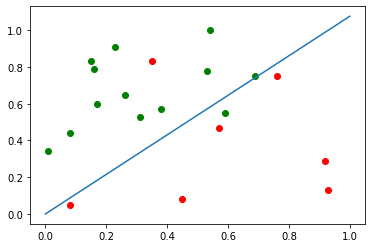

Error rate:  0.1


In [45]:
### Part 2
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_NonLinearSeparable.txt', delimiter=',')
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_NonLinearSeparable.txt', delimiter=',')

w = np.zeros(3)
w_pocket = np.zeros(3)
error_pocket = len(y)

for iteration in range(1000):
    t = 0;
    while t < len(y):
        m = np.zeros(3)
        for i in range (0,3):
            m[i] = x[i][t]
        if ( sign(np.dot(w.T, m)) != y[t] ):
            w = w + y[t] * m
            # reset
            t2 = 0
            error = 0
            while t2 < len(y):
                n = np.zeros(3)
                for j in range (0,3):
                    n[j] = x[j][t2]
                if ( sign(np.dot(w.T, n)) != y[t2] ):
                    error += 1
                t2 +=1
            if error < error_pocket:
                w_pocket = w
                error_pocket = error
                break
        t += 1

# Plot the data and decision boundary

x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []

for i in range(len(y)):
    if (y[i] == 1):
        x1_pos.append(x[1][i])
        x2_pos.append(x[2][i])
    else:
        x1_neg.append(x[1][i])
        x2_neg.append(x[2][i])

plt.scatter(x1_pos, x2_pos, color = 'red')
plt.scatter(x1_neg, x2_neg, color = 'green')

p1 = w_pocket[0] / ( (-1) * w_pocket[2] )
p2 = (w_pocket[0] + w_pocket[1]) / ( (-1) * w_pocket[2] )

a = [0,1]
b = [p1,p2]
plt.plot(a,b)
plt.show()

# Error rate
# We have the number of errors in pocket

print("Error rate: ", str(error_pocket/len(y)))
### End

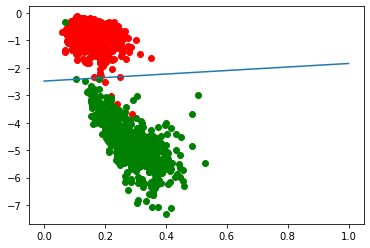

Testing error rate:  0.02358490566037736


In [46]:
### Part 3
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_Digits_HandcraftedFeature_Train.txt', delimiter=',')
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_Digits_HandcraftedFeature_Train.txt', delimiter=',')

w = np.zeros(3)
w_pocket = np.zeros(3)
error_pocket = len(y)

## Training
w = np.zeros(3)
w_pocket = np.zeros(3)
error_pocket = len(y)

for iteration in range(1000):
    t = 0;
    while t < len(y):
        m = np.zeros(3)
        for i in range (0,3):
            m[i] = x[i][t]
        if ( sign(np.dot(w.T, m)) != y[t] ):
            w = w + y[t] * m
            # reset
            t2 = 0
            error = 0
            while t2 < len(y):
                n = np.zeros(3)
                for j in range (0,3):
                    n[j] = x[j][t2]
                if ( sign(np.dot(w.T, n)) != y[t2] ):
                    error += 1
                t2 +=1
            if error < error_pocket:
                w_pocket = w
                error_pocket = error
                break
        t += 1

# Plot the data and decision boundary

x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []

for i in range(len(y)):
    if (y[i] == 1):
        x1_pos.append(x[1][i])
        x2_pos.append(x[2][i])
    else:
        x1_neg.append(x[1][i])
        x2_neg.append(x[2][i])

plt.scatter(x1_pos, x2_pos, color = 'red')
plt.scatter(x1_neg, x2_neg, color = 'green')

p1 = w_pocket[0] / ( (-1) * w_pocket[2] )
p2 = (w_pocket[0] + w_pocket[1]) / ( (-1) * w_pocket[2] )

a = [0,1]
b = [p1,p2]
plt.plot(a,b)
plt.show()


## Testing
x_test = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_Digits_HandcraftedFeature_Test.txt', delimiter=',')
y_test = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_Digits_HandcraftedFeature_Test.txt', delimiter=',')
# y_test_pred = np.zeros(len(y_test))

# Error rate
error = 0
t = 0
while t < len(y_test):
    m = np.zeros(len(x_test))
    for i in range (len(x_test)):
        m[i] = x_test[i][t]
    if ( sign(np.dot(w_pocket.T, m)) != y_test[t] ):
        error += 1
    t += 1

# print(error)
# print(len(y_test))
print("Testing error rate: ", str(error/len(y_test)))
### End

In [47]:
### Part 4
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_Digits_RawFeature_Train.txt', delimiter=',')
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_Digits_RawFeature_Train.txt', delimiter=',')

## Training
w = np.zeros(len(x))
w_pocket = np.zeros(len(x))
error_pocket = len(y)

for iteration in range(100):
    t = 0;
    while t < len(y):
        m = np.zeros(len(x))
        for i in range (len(x)):
            m[i] = x[i][t]
        if ( sign(np.dot(w.T, m)) != y[t] ):
            w = w + y[t] * m
            # reset
            t2 = 0
            error = 0
            while t2 < len(y):
                n = np.zeros(len(x))
                for j in range (len(x)):
                    n[j] = x[j][t2]
                if ( sign(np.dot(w.T, n)) != y[t2] ):
                    error += 1
                t2 +=1
            if error < error_pocket:
                w_pocket = w
                error_pocket = error
                break
        t += 1


# print("Triaining error rate: ", str(error_pocket/len(y)))

## Testing
x_test = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_Digits_RawFeature_Test.txt', delimiter=',')
y_test = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_Digits_RawFeature_Test.txt', delimiter=',')


# Error rate
error = 0
t = 0
while t < len(y_test):
    m = np.zeros(len(x_test))
    for i in range (len(x_test)):
        m[i] = x_test[i][t]
    if ( sign(np.dot(w_pocket.T, m)) != y_test[t] ):
        error += 1
    t += 1

# print(error)
# print(len(y_test))
print("Testing error rate: ", str(error/len(y_test)))

Testing error rate:  0.009433962264150943
